Berkay Günes & Sebastian

In [1]:
import numpy as np
from matplotlib import pyplot as plt

## Bayes Theorem

## Trees and Random Forests
(a) Calculate optimal splits: For the provided (data1d.npy, labels1d.npy) one-dimensional binary classi- fication problem, consider all splits where the smallest i = 1, . . . , N − 1 data points are grouped into one node and the remaining N − i points into the other. For each of these splits, compute the Gini impurity, entropy and misclassifcation rate, and visualize the split that each of these methods would choose.

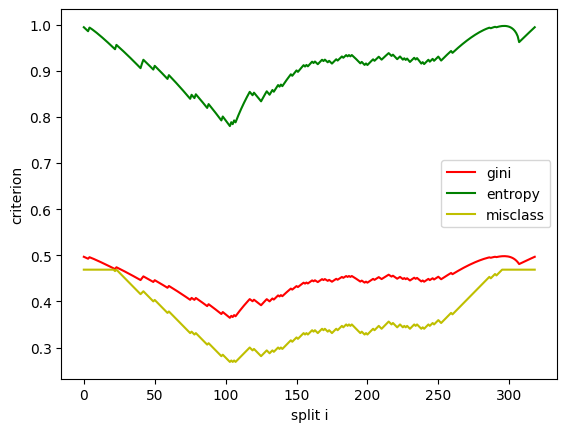

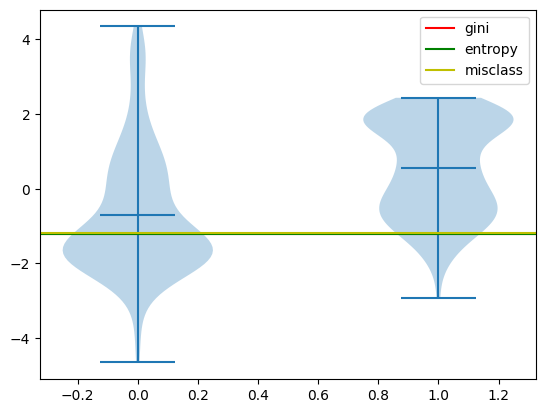

In [87]:
# load the data
pts = np.load('data02/data1d.npy')
labels = np.load('data02/labels1d.npy')


# TODO: Sort the points to easily split them
pts_sorted = pts[np.argsort(pts)]
labels_sorted = labels[np.argsort(pts)]


# TODO: Implement or find implementation for Gini impurity, entropy and misclassifcation rate
def gini_impurity(labels):
    p = np.unique(labels, return_counts=True)[1] / len(labels)
    return 1 - np.sum(p**2)

def entropy(labels):
    p = np.unique(labels, return_counts=True)[1] / len(labels)
    return -np.sum(p * np.log2(p))

def misclassification_rate(labels):
    p = np.unique(labels, return_counts=True)[1] / len(labels)
    return 1 - np.max(p)


# TODO: Iterate over the possible splits, evaulating and saving the three criteria for each one
gini = []
entropys = []
misclass = []
for i in range(1, len(pts_sorted)):
    gini.append((i/len(pts_sorted))*gini_impurity(labels_sorted[:i]) + ((len(pts_sorted)-i)/len(pts_sorted))*gini_impurity(labels_sorted[i:]))
    entropys.append((i/len(pts_sorted))*entropy(labels_sorted[:i]) + ((len(pts_sorted)-i)/len(pts_sorted))*entropy(labels_sorted[i:]))
    misclass.append((i/len(pts_sorted))*misclassification_rate(labels_sorted[:i]) + ((len(pts_sorted)-i)/len(pts_sorted))*misclassification_rate(labels_sorted[i:]))

plt.plot(gini, label='gini', color='r')
plt.plot(entropys, label='entropy', color='g')
plt.plot(misclass, label='misclass', color='y')
plt.xlabel('split i')
plt.ylabel('criterion')
plt.legend()
plt.show()


# TODO: Compute the split that each criterion favours and visualize them 
#       (e.g. with a histogram for each class and vertical lines to show the splits)
gini_split = np.argmin(gini)
entropy_split = np.argmin(entropys)
misclass_split = np.argmin(misclass)

plt.violinplot([pts[labels==0], pts[labels==1]], positions=[0,1], showmeans=True)
plt.axhline(pts_sorted[gini_split], color='r', label='gini')
plt.axhline(pts_sorted[entropy_split], color='g', label='entropy')
plt.axhline(pts_sorted[misclass_split], color='y', label='misclass')
plt.legend()
plt.show()




(b)

In [119]:
# load the dijet data
features = np.load('data02/dijet_features_normalized.npy')
labels = np.load('data02/dijet_labels.npy')


# TODO: define train, val and test splits as specified (make sure to shuffle the data before splitting it!)
x = np.random.permutation(len(labels))

test_features = features.T[x[0:200]].T
test_labels = labels.T[x[0:200]].T

val_features = features.T[x[200:400]].T
val_labels = labels.T[x[200:400]].T

train_features = features.T[x[400:]].T
train_labels = labels.T[x[400:]].T

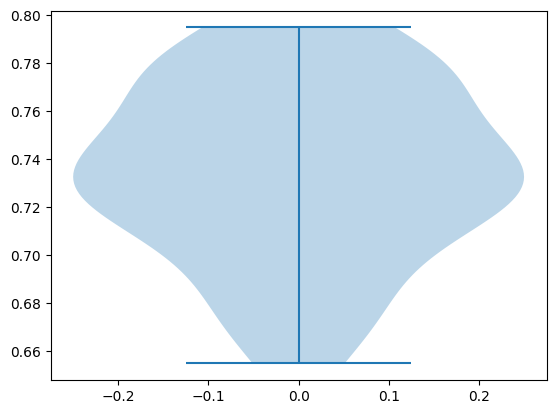

Max score with:
n_estimators: 10, criterion: gini, max_depth: 10, score: 0.795


In [140]:
from sklearn.ensemble import RandomForestClassifier

# TODO: train a random forest classifier for each combination of hyperparameters as specified on the sheet
#       and evaluate the performances on the validation set.

n = [5, 10, 20, 100]
criteria = ['gini', 'entropy']
max_depth = [2, 5, 10, None]

scores = []
max_score = 0
max_params = []

for i in n:
    for j in criteria:
        for k in max_depth:
            rfc = RandomForestClassifier(n_estimators=i, criterion=j, max_depth=k)
            rfc.fit(train_features.T, train_labels)
            score = rfc.score(val_features.T, val_labels)
            scores.append(score)
            if score > max_score:
                max_score = score
                max_params = [i, j, k]

plt.violinplot(scores, positions=[0])
plt.show()

print("Max score with:")
print('n_estimators: ' + str(max_params[0]) + ', criterion: ' + str(max_params[1]) + ', max_depth: ' + str(max_params[2]) + ', score: ' + str(max_score))

In [141]:
# TODO: for your preferred configuration, evaluate the performance of the best configuration on the test set

rfc_max = RandomForestClassifier(n_estimators=max_params[0], criterion=max_params[1], max_depth=max_params[2])
rfc_max.fit(train_features.T, train_labels)
score = rfc_max.score(test_features.T, test_labels)
print('Test score: ' + str(score))

Test score: 0.725


## Fits

(b)

In [ ]:
from scipy.optimize import minimize

data_Vm, data_p = np.load("data02/gas.npy")

# TODO: Implement the ideal gas law

# TODO: Implement the negative log-likelihood

# TODO: Perform the fit, print the results

# TODO: Visualize your results

(c)

In [ ]:
# TODO: Implement the real gas law

# TODO: Implement the negative log-likelihood

# TODO: Perform the fit, print the results

# TODO: Visualize your results